In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from functions import load_and_clean_csv,get_top_n_groups,plot_bar_with_values,plot_bar_without_values,plot_age_distribution,plot_bar_without_values_2

In [2]:
url = "https://raw.githubusercontent.com/AlejandroAlegrePinilla/FitRing/main/merged_data.csv"
df = load_and_clean_csv(url)
df.sample(10)

,age,sex,blood_pressure,heart_rate,obesity,exercise_hours_per_week,sedentary_hours_per_day,bmi,physical_activity_days_per_week,sleep_hours_per_day,country,gdp,population
1612,20,Female,160/78,53,1,3.754897,0,26.119607,3,9,Spain,1425,47.40
706,69,Male,169/75,80,1,15.758139,4,39.234616,4,4,Germany,4223,83.16
262,90,Male,123/94,41,0,11.213953,7,31.994446,2,6,France,2937,67.63
524,61,Male,165/74,93,1,3.247638,7,33.541112,6,7,Germany,4223,83.16
961,20,Male,158/107,66,0,9.920798,1,28.002167,5,9,Italy,2100,59.24
1068,90,Male,166/71,57,0,15.099991,3,30.391477,6,9,Italy,2100,59.24
65,73,Male,157/85,42,1,1.766314,1,19.256649,6,6,France,2937,67.63
1111,77,Male,169/93,85,0,14.373264,8,22.701461,2,4,Italy,2100,59.24
1054,34,Male,132/62,45,1,6.120050,6,35.303700,3,10,Italy,2100,59.24
519,71,Male,110/63,75,1,12.850191,6,38.145993,3,10,Germany,4223,83.16


Top 5 countries with more obesity

In [3]:
top_5_obesity = get_top_n_groups(df, "country", "obesity", n=5)
top_5_obesity

,country,obesity
1,Germany,477
4,United Kingdom,457
0,France,446
2,Italy,431
3,Spain,430


Top 5 countries with more GDP

In [4]:
top_5_gdp = get_top_n_groups(df, "country", "gdp", n=5)
top_5_gdp

,country,gdp
1,Germany,477
4,United Kingdom,457
0,France,446
2,Italy,431
3,Spain,430


Top 5 countries with less physical activity days per week

In [5]:
group_physical_activity_days_per_week = df.groupby('country')["physical_activity_days_per_week"].mean().reset_index()
top_5_physical_activity_days_per_week = group_physical_activity_days_per_week.sort_values(by='physical_activity_days_per_week', ascending=True).head(5)
top_5_physical_activity_days_per_week

,country,physical_activity_days_per_week
1,Germany,3.452830
2,Italy,3.484919
0,France,3.495516
4,United Kingdom,3.654267
3,Spain,3.655814


Top 5 countries with more sedentary hours per day

In [6]:
top_5_sedentary_hours_per_day = get_top_n_groups(df, "country", "sedentary_hours_per_day", n=5)
top_5_sedentary_hours_per_day

,country,sedentary_hours_per_day
1,Germany,477
4,United Kingdom,457
0,France,446
2,Italy,431
3,Spain,430


Top 5 countries

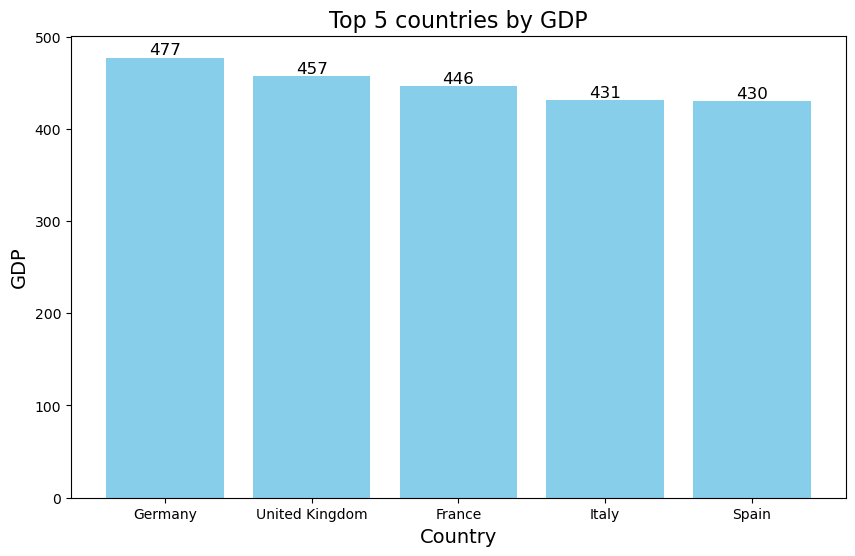

In [7]:
plot_bar_with_values(top_5_gdp, "country", "gdp", "Top 5 countries by GDP", "Country", "GDP")

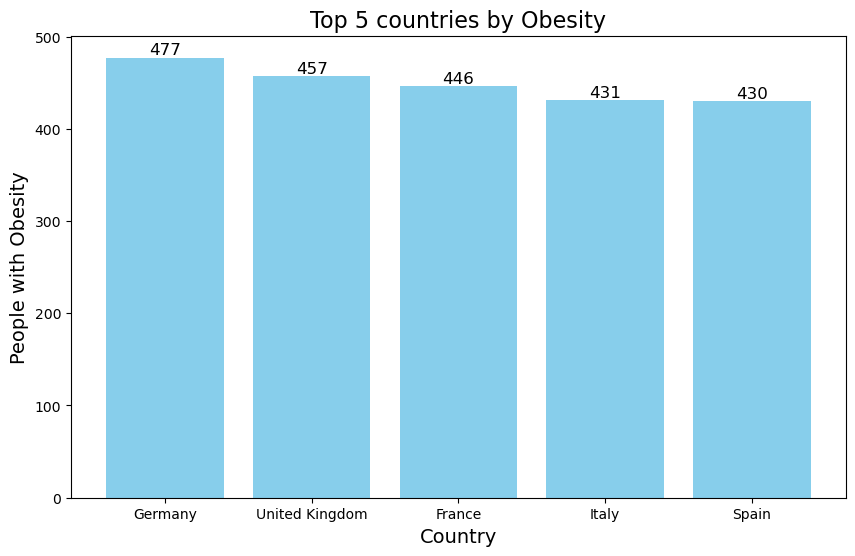

In [8]:
plot_bar_with_values(top_5_obesity, "country", "obesity", "Top 5 countries by Obesity", "Country", "People with Obesity")

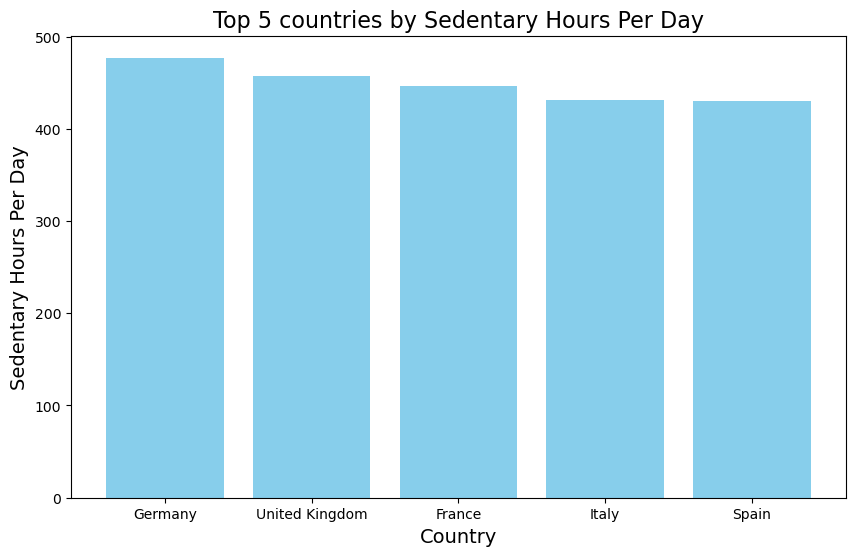

In [9]:
plot_bar_without_values(top_5_sedentary_hours_per_day, "country", "sedentary_hours_per_day", "Top 5 countries by Sedentary Hours Per Day", "Country", "Sedentary Hours Per Day")

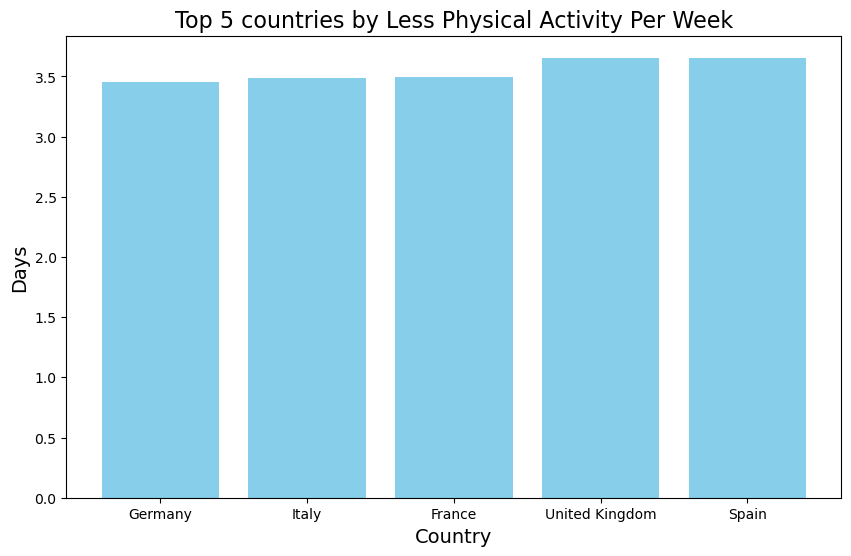

In [10]:
plot_bar_without_values(top_5_physical_activity_days_per_week, "country", "physical_activity_days_per_week", "Top 5 countries by Less Physical Activity Per Week", "Country", "Days")

Germany Age Distribution

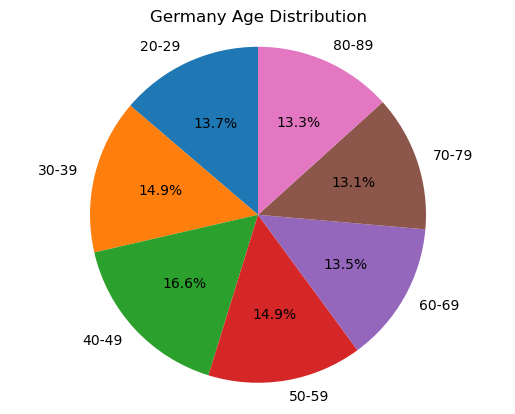

In [11]:
age_bins = [20, 29, 39, 49, 59, 69, 79, 89]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

plot_age_distribution(df, "Germany", age_bins, age_labels)

In [12]:
merged_df = pd.merge(top_5_sedentary_hours_per_day, top_5_physical_activity_days_per_week, on='country')
merged_df_sorted = merged_df.sort_values(by='physical_activity_days_per_week')

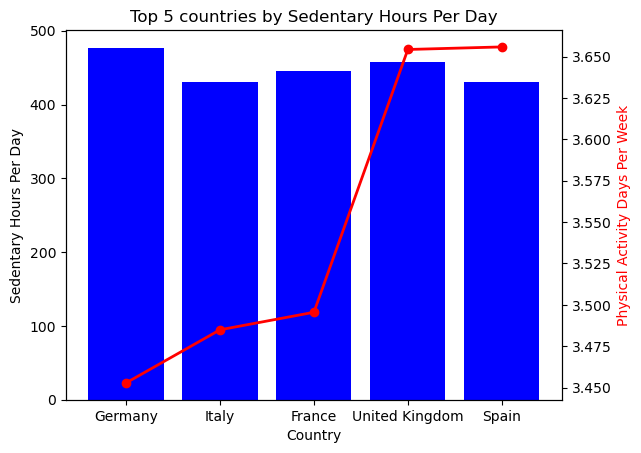

In [13]:
fig, ax1 = plt.subplots()
plot_bar_without_values_2(merged_df_sorted, "country", "sedentary_hours_per_day", "Top 5 countries by Sedentary Hours Per Day", "Country", "Sedentary Hours Per Day", ax1, color='blue')

ax2 = ax1.twinx()
ax2.plot(merged_df_sorted['country'], merged_df_sorted['physical_activity_days_per_week'], color='r', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Physical Activity Days Per Week', color='r')

plt.show()